<a href="https://colab.research.google.com/github/LorenzoCatalan1/ProblemStats24/blob/main/Lab_9_Lorenzo_Catalan_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
#import the necessary libraries
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training data
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Extracting the data and targets as tensors
train_images = train_data.data
train_labels = train_data.targets

train_images.shape, train_labels.shape

Failed to download (trying next):
<urlopen error [Errno -5] No address associated with hostname>



100%|██████████| 9912422/9912422 [00:05<00:00, 1790972.75it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 323441.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 3144577.54it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 3652325.30it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [2]:
import matplotlib.pyplot as plt

In [3]:
28*28

784

In [4]:
train_images[0,:,:] #returns the first image as a 2D tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
x = train_images[0,:,:]

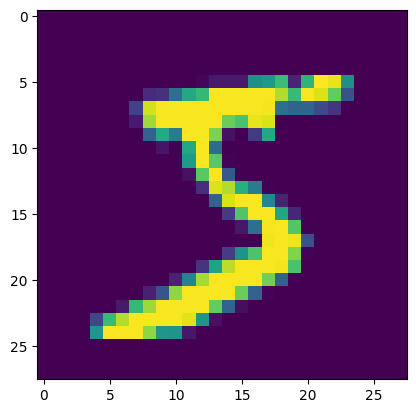

In [6]:
plt.imshow(x) #displays the image(x) as an array of pixel variables

In [7]:
train_labels[0]

tensor(5)

In [8]:
x.shape

torch.Size([28, 28])

In [9]:
x.flatten() #returns a 1D tensor containing all the pixel values of the first image from the MNIST training dataset.

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 1

In [10]:
x = x.flatten()

In [11]:
x.shape

torch.Size([784])

In [12]:
x = x.reshape(28,28)

In [13]:
x.shape

torch.Size([28, 28])

In [14]:
m = torch.rand(10,784) #creates a tensor with a size of(10, 784) filled with random numbers with a distribution over the interval [0, 1)

In [15]:
m

tensor([[0.8986, 0.1086, 0.7209,  ..., 0.0448, 0.9339, 0.5631],
        [0.8282, 0.3361, 0.9152,  ..., 0.5681, 0.6597, 0.5893],
        [0.9257, 0.0343, 0.6434,  ..., 0.3082, 0.0419, 0.1083],
        ...,
        [0.3545, 0.5482, 0.3586,  ..., 0.4443, 0.9565, 0.3885],
        [0.6051, 0.0522, 0.1232,  ..., 0.9597, 0.7483, 0.8426],
        [0.9761, 0.9812, 0.6760,  ..., 0.0200, 0.5468, 0.7887]])

In [16]:
m.shape

torch.Size([10, 784])

In [17]:
x = x.flatten()

In [18]:
x = x/255.0

In [19]:
x

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [20]:
m.shape,x.shape

(torch.Size([10, 784]), torch.Size([784]))

In [21]:
m@x #matrix multiplication between m and x

tensor([52.6560, 53.3916, 52.4655, 58.2253, 50.1318, 53.4677, 53.6376, 52.8730,
        51.9646, 56.5068])

In [22]:
y = torch.matmul(m,x) #sets y to being a matrix multiplication between m and x

In [23]:
y

tensor([52.6560, 53.3916, 52.4655, 58.2253, 50.1318, 53.4677, 53.6376, 52.8730,
        51.9646, 56.5068])

In [24]:
torch.max(y) #returns the max value in the tensor y

tensor(58.2253)

In [25]:
torch.argmax(y) #returns the index of the max value in the tensor y

tensor(3)

In [26]:
x = train_images[0:25,:,:]/255.0 #divides the pixel values of the first 25 images in the MNIST by 255

In [27]:
x.shape

torch.Size([25, 28, 28])

In [28]:
x = x.reshape(25,784)

In [29]:
x.shape

torch.Size([25, 784])

In [30]:
x  = x.T #transposes the tensor x, swapping it's dimensions

In [31]:
x.shape

torch.Size([784, 25])

In [32]:
y = m@x

In [33]:
y.shape

torch.Size([10, 25])

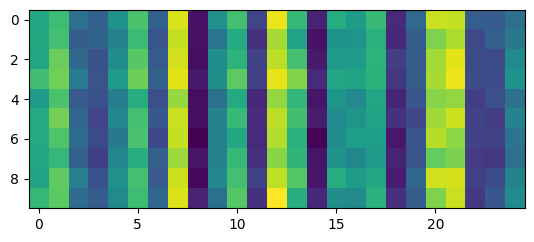

In [34]:
plt.imshow(y)